In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [6]:
df = pd.read_csv("./data/model_data.csv")

In [7]:
df= df.drop(columns=["ID", "WS"])
df_forest = df.dropna()
y_col = "salary_perc"

In [10]:
model = RandomForestRegressor()
param_dist = {
    "n_estimators": [5, 10, 20, 30, 40, 50],
    "max_depth": [2, 5, 15, 20, 25, 30],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2, 4, 10],
    "bootstrap": [True, False]
}

In [ ]:
random_search = RandomizedSearchCV(model, param_dist, cv=5, verbose=2, n_jobs=-1, scoring="neg_mean_absolute_error")
grid_search = GridSearchCV(model, param_dist, cv=5, verbose=2, n_jobs=-1, scoring="neg_mean_absolute_error")

In [11]:
random_search.fit(df_forest.drop(columns=[y_col]), df_forest[y_col])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 5, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [5, 10, 20, 30, 40,
                                                         50]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
# optional
grid_search.fit(df_forest.drop(columns=[y_col]), df_forest[y_col])

In [12]:
# for prediction:
results_random = pd.DataFrame(random_search.cv_results_)
results_random.sort_values(by="rank_test_score", inplace=True)
results_random

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,1.724471,0.136058,0.024537,0.010202,30,5,10,20,True,"{'n_estimators': 30, 'min_samples_split': 5, '...",-0.035796,-0.028163,-0.030830,-0.031557,-0.027666,-0.030802,0.002909,1
0,0.735853,0.029467,0.015759,0.007731,20,5,10,5,True,"{'n_estimators': 20, 'min_samples_split': 5, '...",-0.035778,-0.027909,-0.031167,-0.031790,-0.027745,-0.030878,0.002952,2
2,0.245555,0.015764,0.012564,0.004305,5,5,10,30,True,"{'n_estimators': 5, 'min_samples_split': 5, 'm...",-0.036264,-0.029358,-0.030956,-0.031647,-0.028899,-0.031425,0.002620,3
1,6.314614,0.280892,0.033303,0.001660,50,2,1,25,True,"{'n_estimators': 50, 'min_samples_split': 2, '...",-0.035628,-0.029483,-0.031497,-0.032517,-0.028890,-0.031603,0.002404,4
3,2.214268,0.060765,0.017674,0.009669,20,5,2,30,True,"{'n_estimators': 20, 'min_samples_split': 5, '...",-0.036577,-0.029615,-0.032271,-0.032414,-0.028615,-0.031898,0.002767,5
8,3.006575,0.296314,0.033312,0.013616,30,5,1,30,True,"{'n_estimators': 30, 'min_samples_split': 5, '...",-0.036831,-0.029261,-0.031614,-0.033364,-0.029137,-0.032041,0.002865,6
7,1.485124,0.347167,0.019973,0.008683,10,2,1,20,True,"{'n_estimators': 10, 'min_samples_split': 2, '...",-0.037061,-0.030944,-0.032772,-0.032645,-0.029285,-0.032541,0.002594,7
4,0.532701,0.044585,0.008786,0.002805,10,2,4,5,False,"{'n_estimators': 10, 'min_samples_split': 2, '...",-0.038146,-0.030494,-0.032872,-0.032529,-0.028718,-0.032552,0.003173,8
9,1.815171,0.092707,0.027412,0.006309,30,2,10,25,False,"{'n_estimators': 30, 'min_samples_split': 2, '...",-0.039531,-0.033051,-0.032344,-0.033687,-0.031827,-0.034088,0.002793,9
5,7.642283,0.489716,0.054573,0.020705,50,2,1,25,False,"{'n_estimators': 50, 'min_samples_split': 2, '...",-0.044013,-0.040356,-0.039502,-0.041382,-0.037420,-0.040534,0.002173,10


In [13]:
random_search.best_score_

-0.030802094227807258

In [14]:
random_search.best_params_

{'n_estimators': 30,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_depth': 20,
 'bootstrap': True}

In [21]:
from sklearn.model_selection import train_test_split
import shap

df = df.dropna()
y = df["salary_perc"]
X = df.drop(columns="salary_perc")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Feature Importance from RandomForest
importances = model.feature_importances_
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]}")

Feature ranking:
avg_minutes_played: 0.6061921581218344
PER: 0.18037039255114867
age: 0.0466554568301539
minutes_played: 0.04390055844624416
WS48: 0.0432955594803361
games_played_perc: 0.03163085830255369
games_started_perc: 0.030596764951482624
team_successes: 0.008799325075583732
player_successes: 0.008558926240662653


In [22]:
# SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plotting the SHAP values for a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


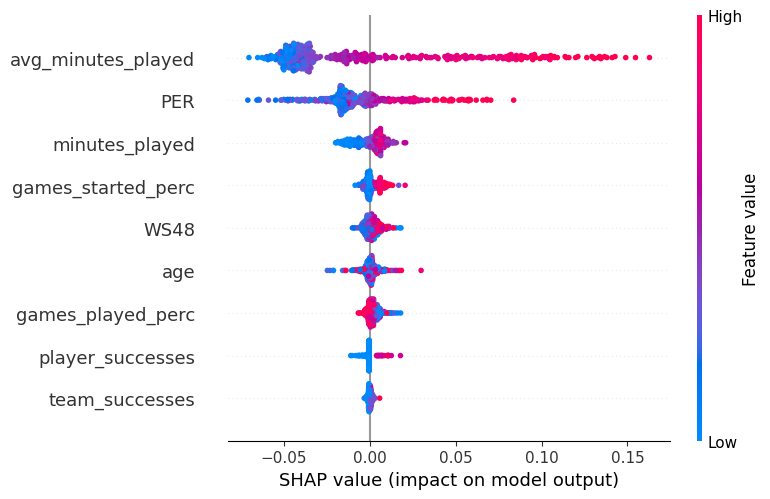

In [23]:
# If you'd like to get a more global overview of the model behavior
shap.summary_plot(shap_values, X_test)

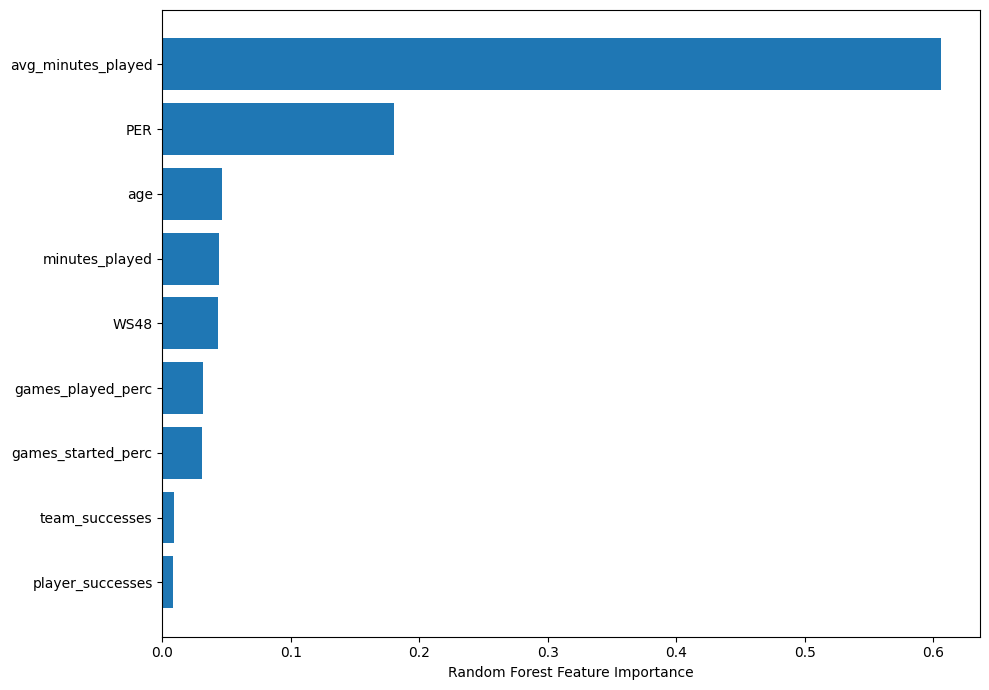

In [24]:
import matplotlib.pyplot as plt
import xgboost as xgb

importances_rf = model.feature_importances_
sorted_idx_rf = importances_rf.argsort()

plt.figure(figsize=(10, 7))
plt.barh(X.columns[sorted_idx_rf], importances_rf[sorted_idx_rf])
plt.xlabel("Random Forest Feature Importance")
plt.tight_layout()
plt.show()


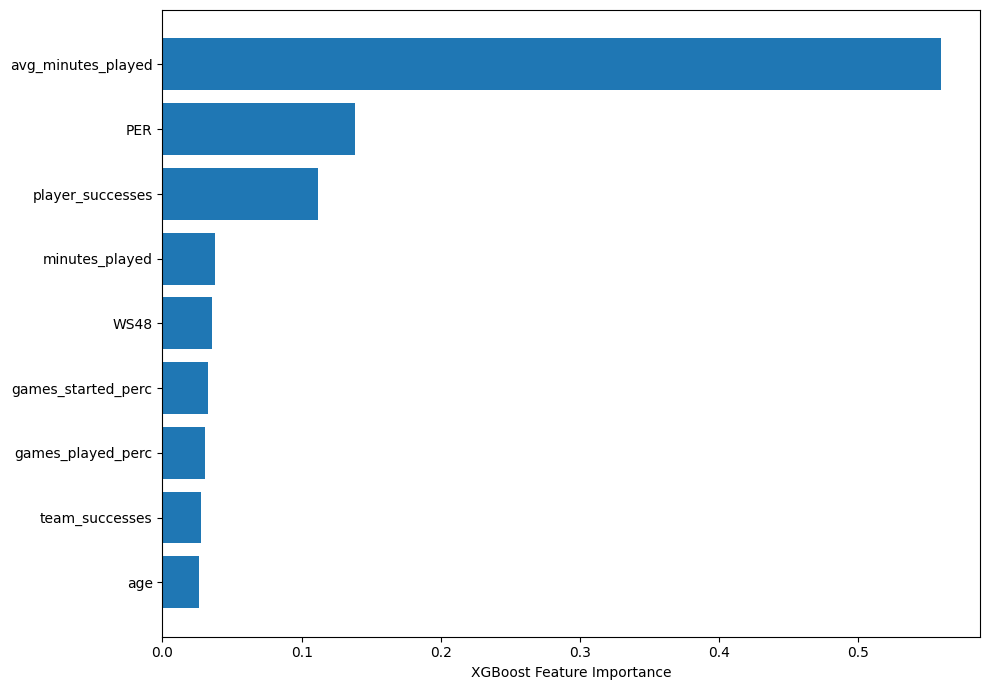

In [25]:
# Train XGBoost model
model_xgb = xgb.XGBRegressor(objective ='reg:squarederror')
model_xgb.fit(X_train, y_train)

# Feature Importance from XGBoost
importances_xgb = model_xgb.feature_importances_
sorted_idx_xgb = importances_xgb.argsort()

plt.figure(figsize=(10, 7))
plt.barh(X.columns[sorted_idx_xgb], importances_xgb[sorted_idx_xgb])
plt.xlabel("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

In [26]:
shap.force_plot(explainer.expected_value, shap_values, X_test)


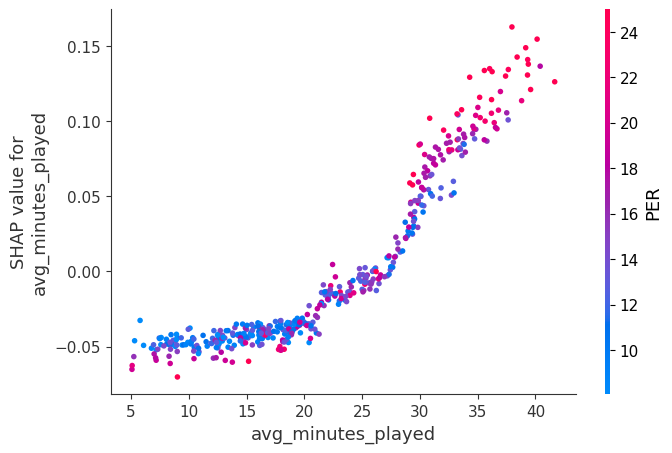

In [27]:
# For a particular feature, say 'FeatureName'
shap.dependence_plot('avg_minutes_played', shap_values, X_test)

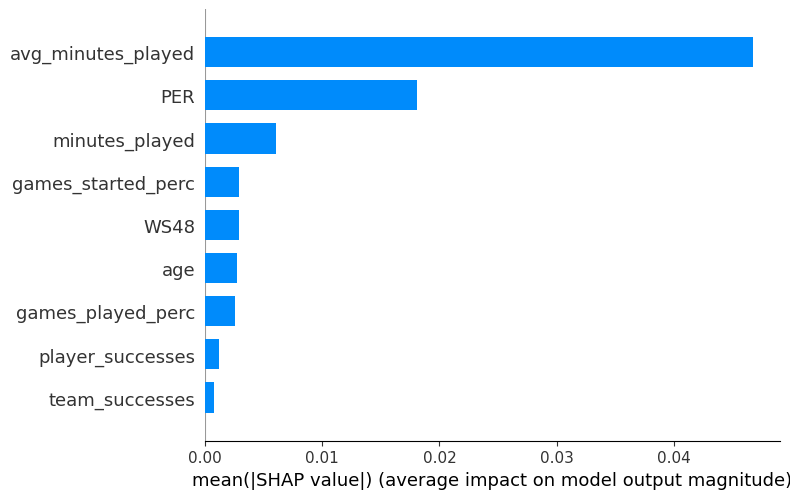

In [29]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

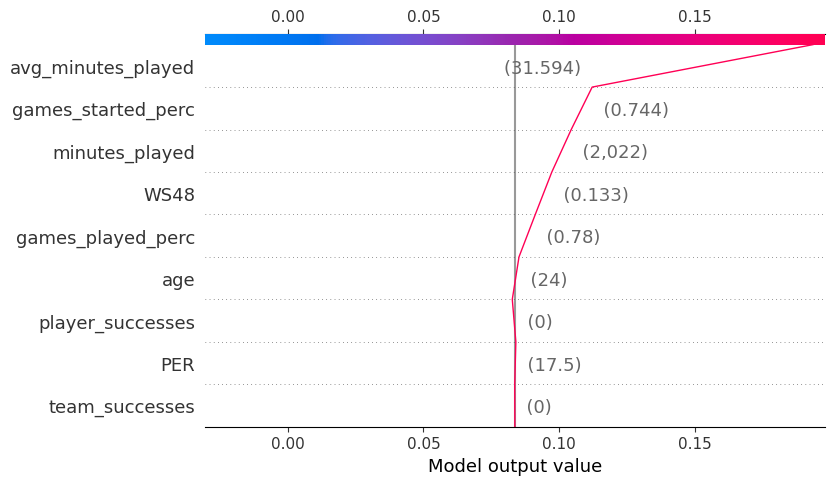

In [30]:
shap.decision_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])

In [ ]:
# 1. xgboosta przeleciec jak RF
# 2. Feature importance na najlepszych modelach (poczytac o metodach okreslania waznosci cech)
# 3. XAI 
# 3.1 wyjasnic RF 
# 3.2 wyjasnic XGB 